In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import numpy as np
import seaborn as sns

## Исходные данные

In [78]:
df = pd.read_csv(r"C:\Users\Максем\Downloads\insurance.csv")
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


### Описание входных данных
Входные данные представляют набор признаков человека и рассчетной стоимости страхования здоровья в зависимости от значения признаков.
В датасете представлены следующие признаки:
1. age - возраст субъекта страхования
2. sex - пол субъекта
3. bmi - индекс массы тела, дающий представление о теле, относительно высоком или низком весе по отношению к росту. Объективный показатель массы тела (кг/м2). Идеальные показатели: от 18,5 до 24,9
4. children - количество детей, охваченных медицинской страховкой
5. Smoker - бинарный признак. Является ли курильщиком человек
6. charges - индивидуальные медицинские расходы, оплачиваемые медицинской страховкой
Данные собраны с жителей США, распределенных по различным штатам. 
Общее количество субъектов в выборке составляет 1337

Исключим из исследования категориальные признаки, а именно: sex, smoker и дискретный признак количества детей

### EDA

Общие показатели по рядам

In [79]:
df = df.drop(columns=['children', 'smoker', 'region', 'sex'])

In [80]:
df.describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


Коэффициент вариации

In [81]:
from scipy.stats import variation

In [82]:
print(f'Коэффициент вариации для age {variation(df["age"])}')
print(f'Коэффициент вариации для bmi {variation(df["bmi"])}')
print(f'Коэффициент вариации для charges {variation(df["charges"])}')

Коэффициент вариации для age 0.35821919392518253
Коэффициент вариации для bmi 0.19880079396374153
Коэффициент вариации для charges 0.9122155070649334


### Вывод:
Коэффициент вариации для рядов charges, age является высоким (> 33%) относительно нормы, следовательно данные признаки являются изменчивыми относительно среднего значения

## Распределения признаков

In [83]:
#Задание стандартного размера графика sns
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})

### Age

c:\Users\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

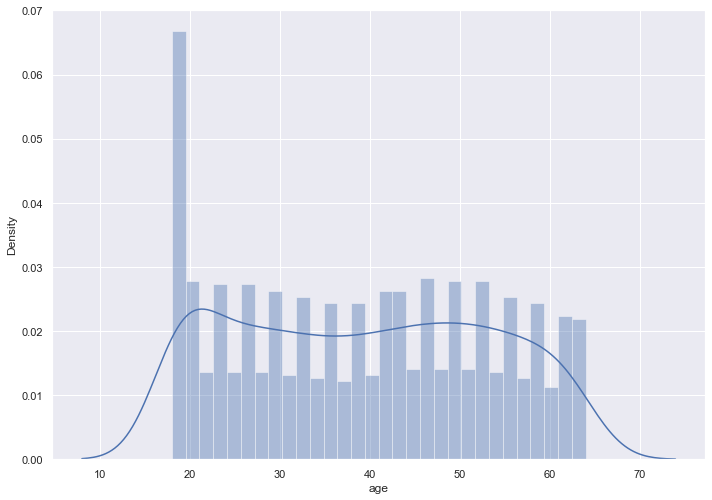

In [84]:
sns.distplot(df['age'], bins = 30)

### BMI

c:\Users\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

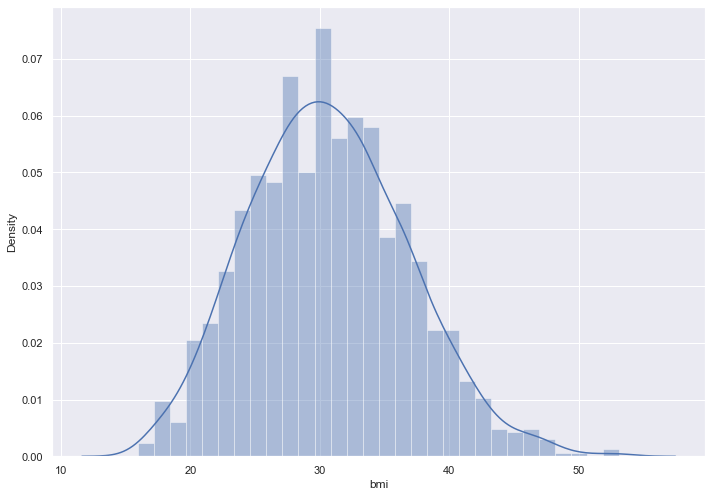

In [85]:
sns.distplot(df['bmi'], bins = 30)

### Charges

c:\Users\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

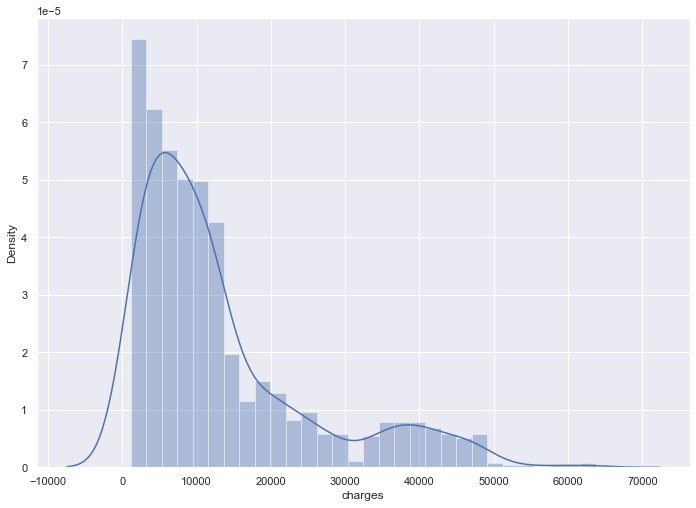

In [86]:
sns.distplot(df['charges'], bins = 30)

### Выводы:
1. После построения распределений вариационных рядов можно сделать вывод о визуальной ассиметрии ряда charges, визуальной симметрии рядов age, bmi
2. Распределения визуально не имеют значительных выбросов

## Меры центральной тенденции

In [87]:
print(f'age: среднее = {df["age"].mean()} , мода = {scipy.stats.mode(df["age"])} , медиана = {df["age"].median()}')

age: среднее = 39.20702541106129 , мода = ModeResult(mode=array([18], dtype=int64), count=array([69])) , медиана = 39.0


In [88]:
print(f'age: среднее = {df["bmi"].mean()} , мода = {scipy.stats.mode(df["bmi"])} , медиана = {df["bmi"].median()}')

age: среднее = 30.663396860986538 , мода = ModeResult(mode=array([32.3]), count=array([13])) , медиана = 30.4


In [89]:
print(f'age: среднее = {df["charges"].mean()} , мода = {scipy.stats.mode(df["charges"])} , медиана = {df["charges"].median()}')

age: среднее = 13270.422265141257 , мода = ModeResult(mode=array([1639.5631]), count=array([2])) , медиана = 9382.033


### Вывод:
Мы рассчитали меры центральной тенденции для каждого из рассматриваемых рядов, теперь мы можем использовать их в дальнейших расчетх

## Ассиметрия и тип вершины
Рассмотрим коэффициент ассиметрии и показатель экцесса

In [90]:
from scipy.stats import skew
from scipy.stats import kurtosis

Показатель экцесса

In [91]:
print(f'Age: {kurtosis(df["age"], axis=0, bias=True)}')
print(f'BMI {kurtosis(df["bmi"], axis=0, bias=True)}')
print(f'Charges {kurtosis(df["charges"], axis=0, bias=True)}')

Age: -1.2449206804584227
BMI -0.05502310583700032
Charges 1.595821363956751


Показатель экцесса для рядов age, bmi < 0 - график эмпирического распределения туповершинный. Для ряда charges > 0 - график эмпирического распределения островершинный

Коэффициент ассиметрии

In [92]:
print(f'Age: {skew(df["age"], axis=0, bias=True)}')
print(f'BMI {skew(df["bmi"], axis=0, bias=True)}')
print(f'Charges {skew(df["charges"], axis=0, bias=True)}')

Age: 0.055610083072599126
BMI 0.28372857291709386
Charges 1.5141797118745743


### Вывод:
Коэффициент ассиметрии для ряда age < 0,25 - значит ассиметрия незначительная; Для рядов BMI, charges > 0,25 - значит ассиметрия является значительной.

## Плотность распределения

Age

<AxesSubplot:xlabel='age', ylabel='Density'>

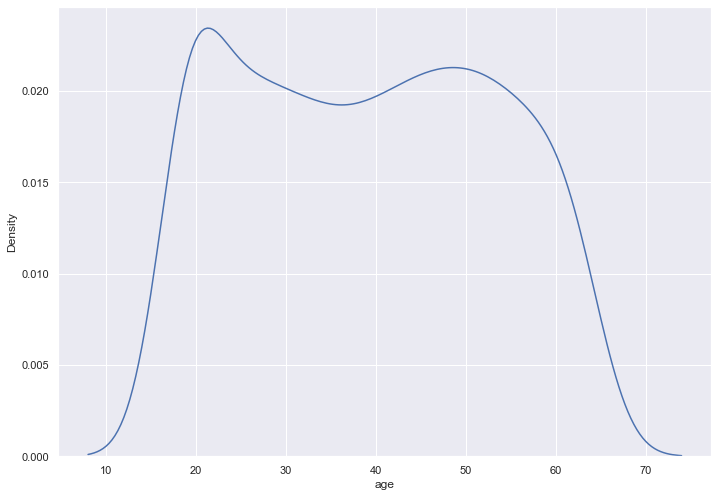

In [93]:
column = 'age'
sns.kdeplot(df[column], label=column)

Bmi

<AxesSubplot:xlabel='bmi', ylabel='Density'>

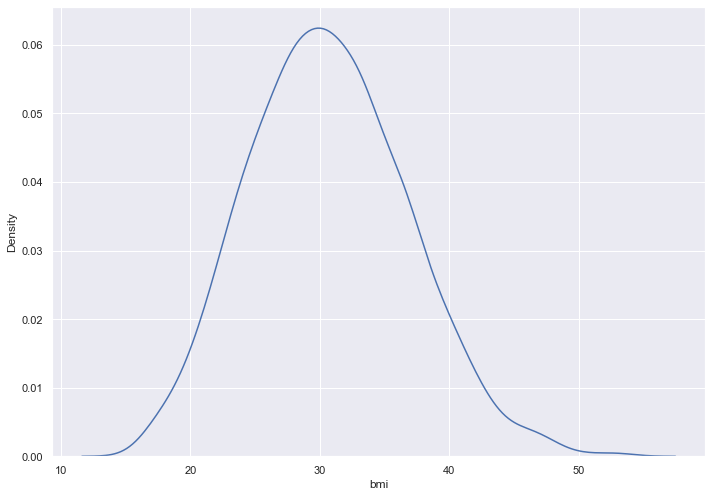

In [94]:
column = 'bmi'
sns.kdeplot(df[column], label=column)

Charges

<AxesSubplot:xlabel='charges', ylabel='Density'>

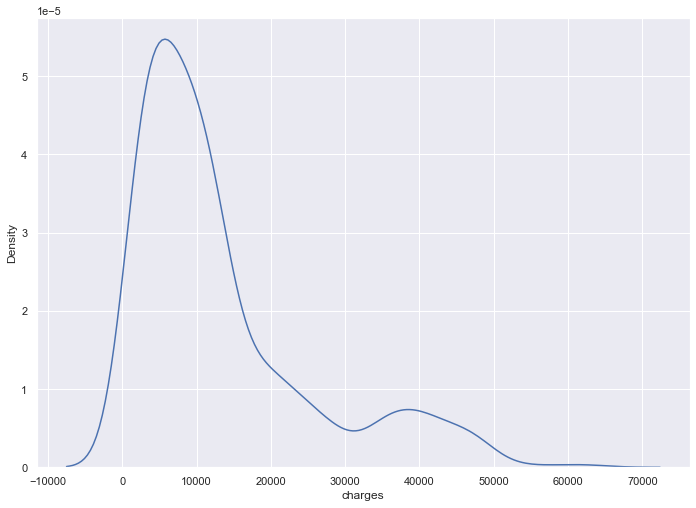

In [95]:
column = 'charges'
sns.kdeplot(df[column], label=column)

## Boxplot

### Age

<AxesSubplot:ylabel='age'>

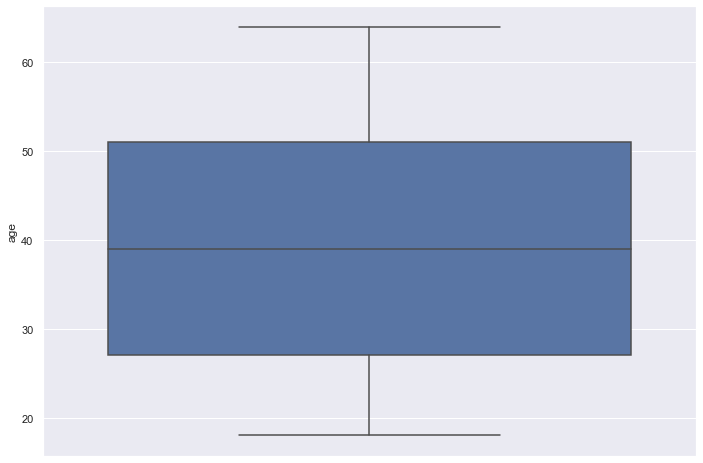

In [96]:
sns.boxplot(y = df['age'])

### BMI

<AxesSubplot:ylabel='bmi'>

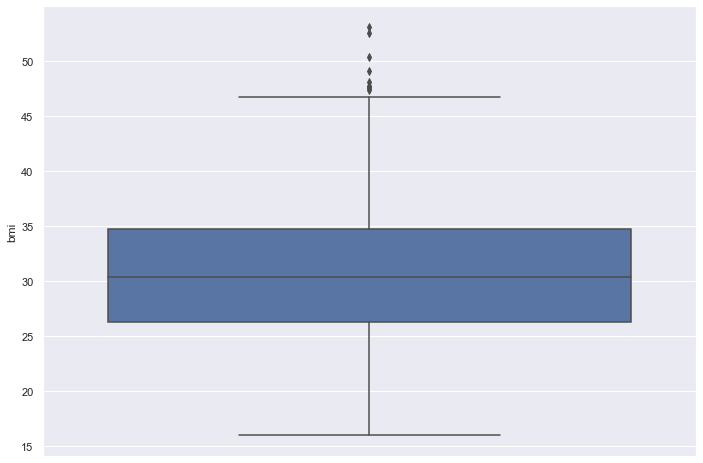

In [97]:
sns.boxplot(y = df['bmi'])

### Charges

<AxesSubplot:ylabel='charges'>

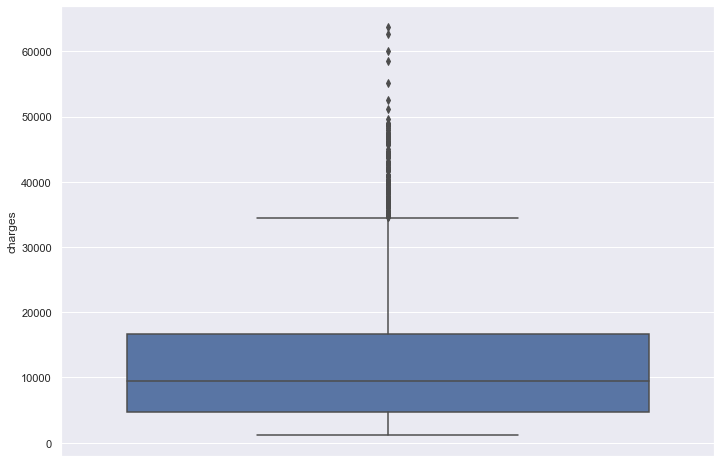

In [98]:
sns.boxplot(y = df['charges'])

### Выводы:
1. По boxplot ряда age можно сказать, что выбросы отсутствуют, что является вполне ожидаемым результатом
2. По boxplot ряда bmi можно обнаружить выбросы на 10 единиц
3. По boxplot ряда charges мы видим значительные выбросы, предельные приблизительно в размере 30 000

## Кореляции
Рассмотрим корреляции между всеми признаками

Точечные диаграммы для визуального анализа корреляций

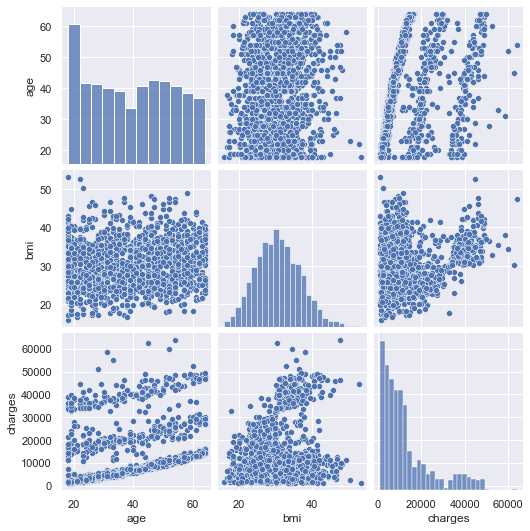

In [99]:
sns.pairplot(df)

Матрица корреляций для количественного анализа корреляций

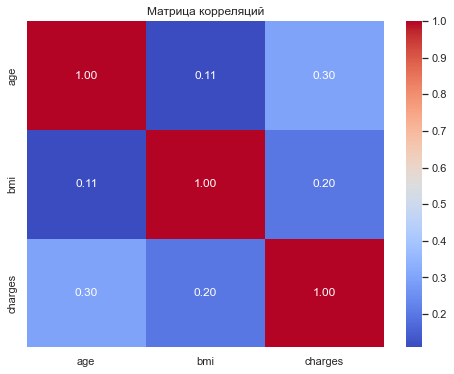

In [100]:
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матрица корреляций')
plt.show()

### Вывод:
1. Корреляцию между вариационным признаком charges и age - является умеренной по шкале Чеддока
2. Корреляция по иным признакам является слабой

In [108]:
import optuna
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [111]:
df = pd.read_csv(r"C:\Users\Максем\Downloads\insurance.csv")
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [112]:
# Преобразование категориальных признаков в числовые
df = pd.get_dummies(df, columns=['sex', 'children', 'smoker', 'region'])

# Разделение данных на обучающий и тестовый наборы
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение функции для оптимизации
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),
        'random_seed': 42,
        'loss_function': 'RMSE',
        'verbose': False
    }

    model = CatBoostRegressor(**params)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=20, verbose=False)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    return mse

# Создание study и запуск оптимизации
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Получение лучших параметров и обучение модели с этими параметрами
best_params = study.best_params
best_model = CatBoostRegressor(**best_params)
best_model.fit(X_train, y_train)

# Предсказание на тестовом наборе и расчет метрик
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print("MSE:", mse)
print("MAPE:", mape)

[I 2024-04-11 05:37:58,019] A new study created in memory with name: no-name-477b2445-136d-49c2-9878-6583527a76ce
C:\Users\Максем\AppData\Local\Temp\ipykernel_19964\2768208734.py:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
C:\Users\Максем\AppData\Local\Temp\ipykernel_19964\2768208734.py:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 0.1, 10.0),
[I 2024-04-11 05:37:58,205] Trial 0 finished with value: 18014833.069356818 and parameters: {'iterations': 418, 'depth': 4, 'learning_rate': 0.10394876853480324, 'l2_leaf_reg': 2.4805033391987084}

0:	learn: 11176.2152878	total: 1.46ms	remaining: 277ms
1:	learn: 10422.0889324	total: 3.12ms	remaining: 295ms
2:	learn: 9802.9902528	total: 4.67ms	remaining: 293ms
3:	learn: 9172.9496639	total: 6.14ms	remaining: 287ms
4:	learn: 8616.0959933	total: 7.55ms	remaining: 281ms
5:	learn: 8167.9049805	total: 8.76ms	remaining: 270ms
6:	learn: 7701.6095144	total: 10.2ms	remaining: 268ms
7:	learn: 7303.5257194	total: 11.8ms	remaining: 269ms
8:	learn: 7003.4672287	total: 12.6ms	remaining: 255ms
9:	learn: 6674.8031277	total: 14ms	remaining: 253ms
10:	learn: 6386.3092011	total: 15.5ms	remaining: 253ms
11:	learn: 6124.2268845	total: 16.7ms	remaining: 249ms
12:	learn: 5886.8495514	total: 18ms	remaining: 246ms
13:	learn: 5694.7065838	total: 19.4ms	remaining: 245ms
14:	learn: 5531.0228431	total: 20.8ms	remaining: 244ms
15:	learn: 5404.4397926	total: 22ms	remaining: 241ms
16:	learn: 5273.3023015	total: 23.2ms	remaining: 237ms
17:	learn: 5161.4642804	total: 24.6ms	remaining: 236ms
18:	learn: 5057.2663550	

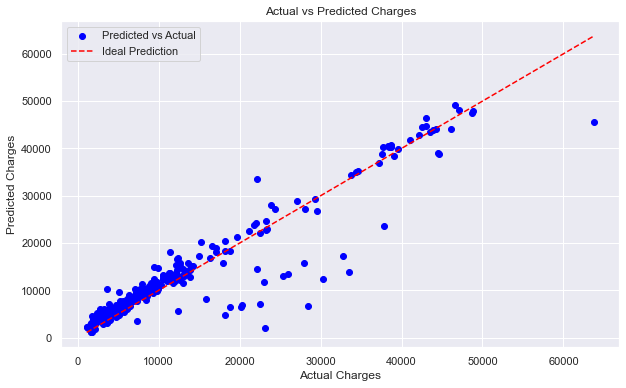

In [116]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Ideal Prediction')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Charges')
plt.legend()
plt.show()